In [1]:
# Include all the necessary packages, 
import random
import pandas as pd # pandas for data manipulation and analysis
import numpy as np # numpy to handle multi-dimensional arrays and matricies
import matplotlib # matplotlib for pixel plot
import matplotlib.pyplot as plt

## Read the database and watch the records

In [2]:
#  Kaggle database for emotion detection
df = pd.read_csv('fer2013.csv')
# Print the front content of the databse
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# Print the end of the database
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


## Convert the database to view the images

In [4]:
# Convert the pixel column values into a Python list object
pixels = df['pixels'].tolist()
emotions = df['emotion'].tolist()

# The fer2013 database contains 48x48 face images so we create two variables 
# to store the width and the height of the image
width, height = 48, 48

# Convert each pixel set (pixel array) to a 48x48 image and
# create a list called faces to store each face image
faces = []
for pixel_sequence in pixels:
    # Use Python's list comprehension because it's quicker than a single for cycle
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    # Reshape face array to matches the 48x48 face images
    face = np.asarray(face).reshape(width, height)
    # Add the converted face image to the faces list
    faces.append(face.astype('uint8'))

# Convert the list to a numpy array
faces = np.asarray(faces)
emotions = np.asarray(emotions)

# Create a dictionary for identify the emotion
emotion_dict = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

## Database visualization

In [6]:
# View "number_of_imgs" random images from an image path -- (all: faces, train: X_train, validation: X_valid, test: X_test)
def view_random_images(images=faces, emotions=emotions, number_of_imgs=10):
    # Set starting values
    idxs = np.random.randint(0, images.shape[0], size=number_of_imgs)
    face_img = [images[idx] for idx in idxs]
    # Set width and height to inch unit
    figure = plt.figure(figsize=(15,15))
    
    # Iterate through the images
    for i in range(number_of_imgs):
        subp = figure.add_subplot(10,10,i+1)
        # Setting the gray colourmap
        subp.imshow(face_img[i], cmap=matplotlib.cm.gray)
        # Naming the emotion of the selected random picture with the use of emotion_dict
        subp.title.set_text(emotion_dict[(emotions[idxs[i]])])
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

# View an image by an "id" from an image path -- (all: faces, train: X_train, validation: X_valid, test: X_test)
def view_image_by_id(idx, images=faces):
    fig = plt.figure()
    # User can pick one image from the database, and set gray colourmap
    imgplot = plt.imshow(images[idx], cmap=matplotlib.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()  

# View "num_per_categories" random images from all of the unique categories 
# from an image path-- (all: faces, train: X_train, validation: X_valid, test: X_test)
def unique_category_view(num_per_categories=1, images=faces, emotions=emotions):
    unique_emotions = df.emotion.unique()
    figure = plt.figure(figsize=(15,15))
    plot_idx = 0
    # Iterate through the subcategories
    for emotion in unique_emotions:
        idx = df[df.emotion == emotion].sample(n=num_per_categories).index.values
        for i in idx:
            subp = figure.add_subplot(7,7,plot_idx+1)
            # Setting the gray colourmap
            subp.imshow(images[i], cmap=matplotlib.cm.gray)
            # Naming the emotion of the selected random picture with the use of emotion_dict
            subp.title.set_text(emotion_dict[emotions[i]])
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
            plot_idx += 1    

## Execute the written functions
## 1. View random faces from the complete database

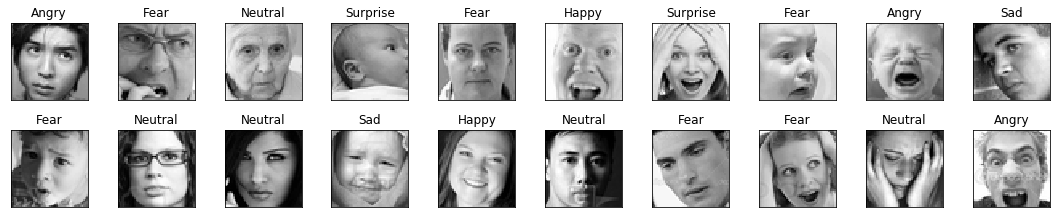

In [7]:
view_random_images(number_of_imgs=20)

## 2. View a face by a specified id

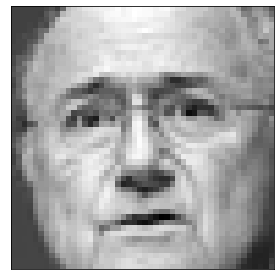

In [8]:
view_image_by_id(idx=5)

## 3. View faces from unique categories

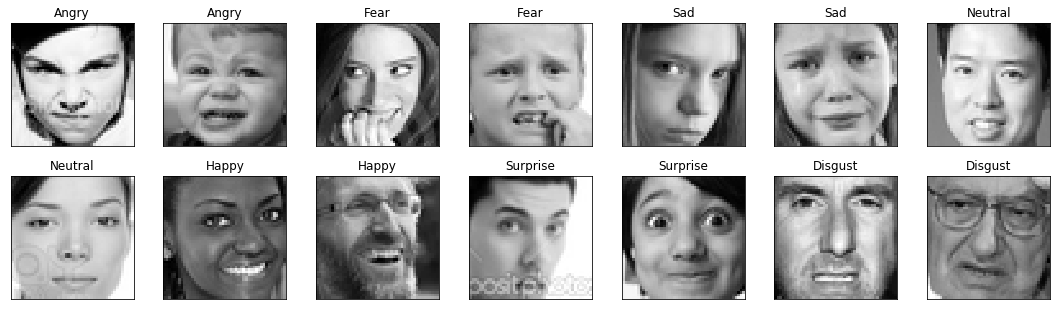

In [9]:
unique_category_view(num_per_categories=2)

## Plot the number of faces per categories

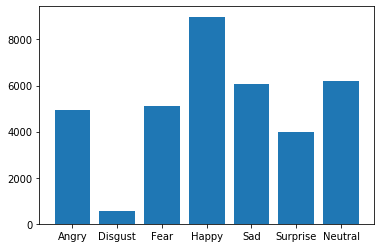

In [15]:
# Count the number of faces in each emotion 
value_counts = df['emotion'].value_counts().sort_index()
fig, ax = plt.subplots()
# Naming the columns as emotions
x_ticks_labels = [emotion_dict[i] for i in range(len(value_counts))]
plt.bar(range(0, len(value_counts)), value_counts)
plt.xticks(range(0, len(value_counts)), x_ticks_labels)
plt.show()

## Do some image augmentation

<p>As we can see the dispersion of the images by faces is not well balanced, so we balance it with image augmentation techniques. </p>

In [16]:
from PIL import Image # Use of Python Image Library
from scipy import ndimage # Use the SciPy library for scientifical computing

In [17]:
# Different image augmentation techniques

# Function to show two image side by side
def display_side_by_side(img1, img2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1, cmap=matplotlib.cm.gray)
    ax[0].axis('off')
    ax[1].imshow(img2, cmap=matplotlib.cm.gray)
    ax[1].axis('off')

# Function to rotate any picture
def rotate_img(idx):
    # Choose a random rotation angle
    angle = np.random.choice(np.random.uniform(-45,45,100))
    # Copy the image
    nimg = np.copy(faces[idx])
    # Rotate the selected face with the random angle
    rot_img = ndimage.rotate(nimg, angle)
    # Keeping the original rate of height and width
    height, width = faces[idx].shape
    rot_img = Image.fromarray(rot_img).resize((width,height))
    return rot_img

# Function to blur a selected picture
def blur_img(idx):
    nimg = np.copy(faces[idx])
    # Set the value of the blur (Value is a random number between 0 and 1.5)
    sigma = np.random.random_sample()*1.5
    # Bluring the image with the help of Gaussian filter
    blurred_img = ndimage.gaussian_filter(nimg, sigma=sigma)
    return blurred_img

def flip_img(idx):
    nimg = np.copy(faces[idx])
    # Vertical flip the image
    flipped_img = np.fliplr(nimg)
    return flipped_img

# Function to add noise to the selected picture
def add_noise(idx):
    nimg = np.copy(faces[idx])
    noise = (np.random.normal(0,0.01,size=(48, 48)) * 255).astype(np.uint8)
    nimg += noise
    noisy_img = np.clip(nimg, 0, 255)
    return noisy_img

# Function which call randomly all the previous methods
def augment_img(idx):
    methods = [rotate_img, blur_img, flip_img, add_noise]

    method = np.random.choice(methods)
    return method(idx)

## View each of the transformation

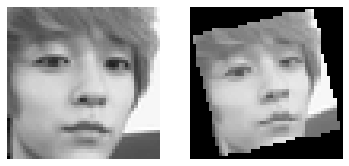

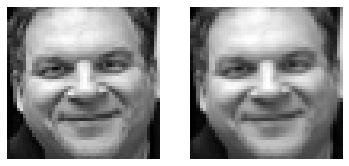

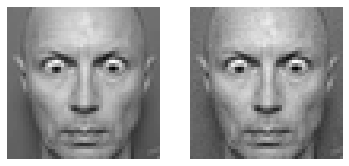

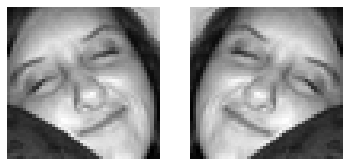

In [18]:
rot_img = rotate_img(13)
display_side_by_side(faces[13], rot_img)

blurred_img=blur_img(14)
display_side_by_side(faces[14], blurred_img)

noisy_img=add_noise(15)
display_side_by_side(faces[15], noisy_img)

flipped_img=flip_img(16)
display_side_by_side(faces[16], flipped_img)

## Balance the database with transformed images

In [19]:
# We use the augmentation techniques to equalize each emotion section to the same number
pictures_to_make = [np.max(value_counts) - value_counts[i] for i in range(len(value_counts))]

transformed_faces = []
transformed_emotions = []

for emotion in range(len(pictures_to_make)):
    for n in range(pictures_to_make[emotion]):
        # Choose a random image
        idx = df[df.emotion == emotion].sample(n=1).index.values
        # Do the augmentation
        new_img = augment_img(idx[0])
        new_img = np.asarray(new_img)
        transformed_faces.append(new_img)
        transformed_emotions.append(df.iloc[[idx.squeeze()],[0]].values.squeeze())

transformed_emotions = np.asarray(transformed_emotions)
transformed_faces = np.asarray(transformed_faces)

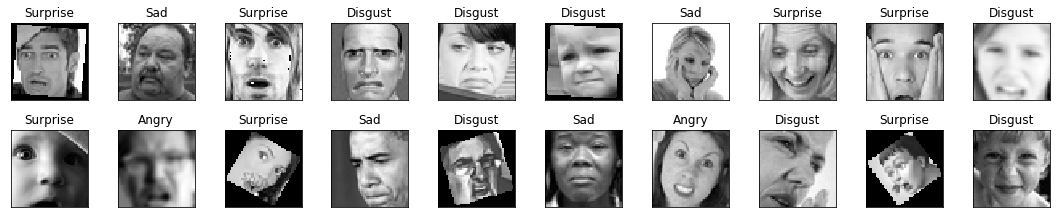

In [20]:
view_random_images(images=transformed_faces, emotions=transformed_emotions, number_of_imgs=20)

In [21]:
faces_full = np.concatenate((faces, transformed_faces))
emotions_full = np.concatenate((emotions, transformed_emotions))

## Create the new database

In [22]:
# After the equalization, we make the new databse
augmented_df = pd.DataFrame()           
for i in range(len(emotions_full)):
    row = pd.Series([emotions_full[i], faces_full[i]], index=["emotion", "pixels"], name=str(i))
    augmented_df = augmented_df.append(row)

In [23]:
# Print the front content of the new databse
augmented_df.head()

,emotion,pixels
0,0.0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0.0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2.0,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4.0,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6.0,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."


In [24]:
# Print the end of the new database
augmented_df.tail()

,emotion,pixels
62918,6.0,"[[135, 89, 31, 25, 18, 16, 24, 22, 19, 13, 13,..."
62919,6.0,"[[71, 70, 70, 72, 71, 71, 69, 73, 72, 71, 69, ..."
62920,6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
62921,6.0,"[[12, 24, 67, 85, 84, 136, 135, 146, 171, 183,..."
62922,6.0,"[[13, 14, 16, 17, 17, 17, 17, 19, 21, 23, 27, ..."


## View the balanced database

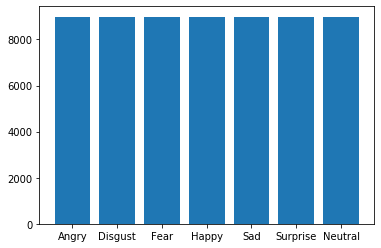

0.0    8989
1.0    8989
2.0    8989
3.0    8989
4.0    8989
5.0    8989
6.0    8989
Name: emotion, dtype: int64


In [25]:
# With this, we checked that the new database really contain equal
# number of pictures
value_counts = augmented_df['emotion'].value_counts().sort_index()
fig, ax = plt.subplots()
x_ticks_labels = [emotion_dict[i] for i in range(len(value_counts))]
plt.bar(range(0, len(value_counts)), value_counts)
plt.xticks(range(0, len(value_counts)), x_ticks_labels)
plt.show()
print(value_counts)

## Split the dataset into train, validation, test datasets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the train data into a train and validation group (validation = 20% of the train data)
X_train, X_val, y_train, y_val = train_test_split(faces_full, emotions_full, test_size=0.2, random_state=30)
# Split the train data into a train and test group (test = 10% of the original train data)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=30)

In [28]:
print("All images:", faces_full.shape[0])
print("X train:", X_train.shape[0], "Y train:", y_train.shape[0])
print("X validaton:", X_val.shape[0], "Y validaton:", y_val.shape[0])
print("X test:", X_test.shape[0], "Y test:", y_test.shape[0])

All images: 62923
X train: 44045 Y train: 44045
X validaton: 12585 Y validaton: 12585
X test: 6293 Y test: 6293


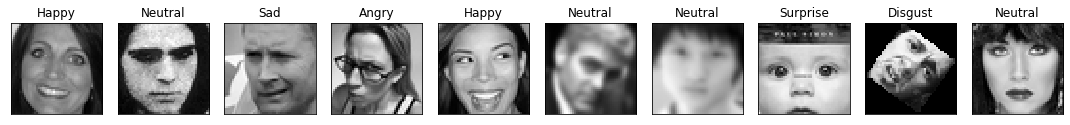

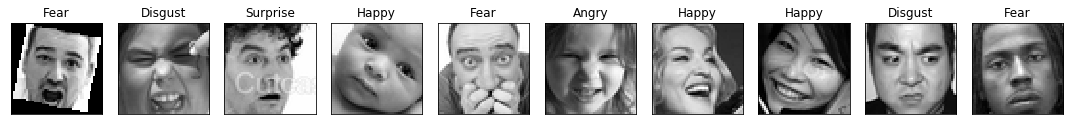

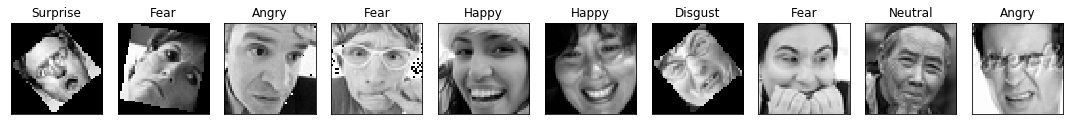

In [29]:
view_random_images(images=X_train, emotions=y_train, number_of_imgs=10)
view_random_images(images=X_val, emotions=y_val, number_of_imgs=10)
view_random_images(images=X_test, emotions=y_test, number_of_imgs=10)

<h1> The completed, splitted database variables is:</h1>
<p> Train: X_train, y_train </p>
<p> Validation: X_val, y_val </p>
<p> Test: X_test, y_test </p>